# Utilización de gráficos para estadísticos descriptivos

In [1]:
import pandas as pd

# Importar dataset ambiental
CO2Data = pd.read_csv("../data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

print(CO2Data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear paleta de colores propia (viridis simplificada)
my_colors = ["#5ec962", "#3b528b"]

# Ajustar estilo
sns.set(font_scale=2, style="ticks", palette=my_colors)


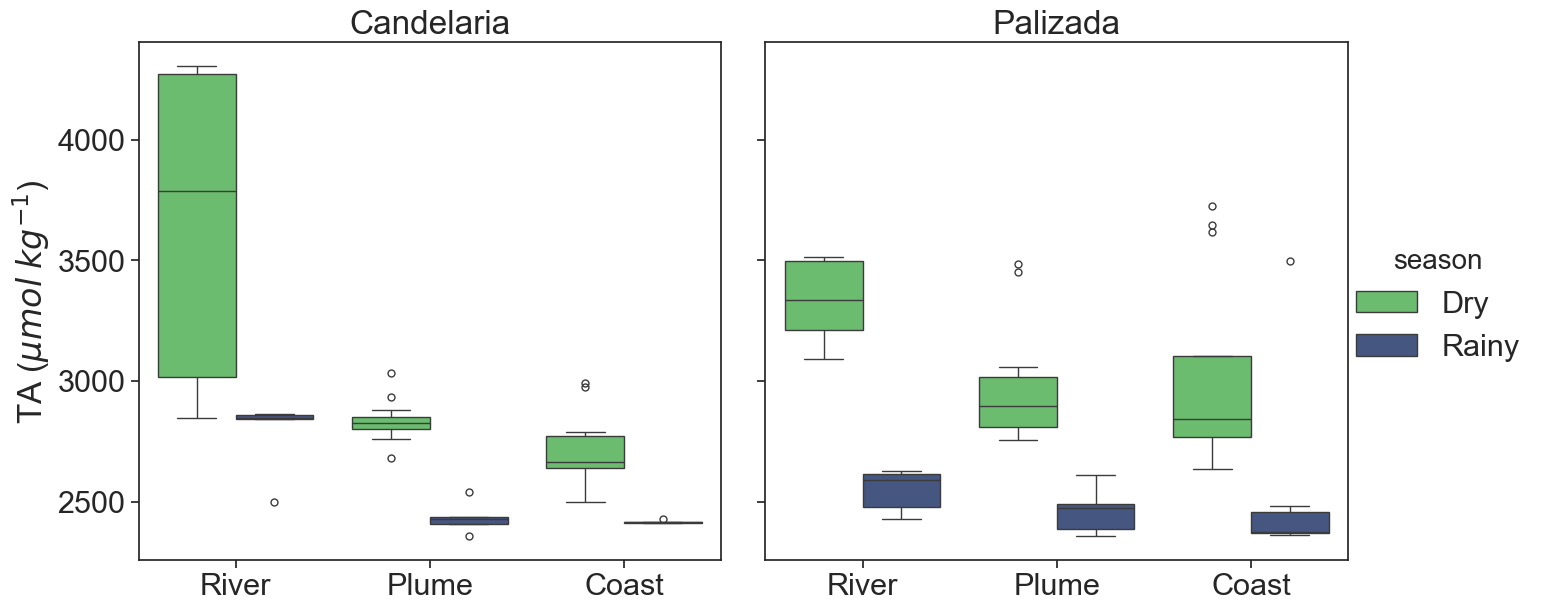

In [3]:
ax = sns.catplot(
    data=CO2Data,
    x="area", y="ta_micromol_kg",
    hue="season", col="estuary",
    kind="box",
    height=7, aspect=1
)

ax.set(xlabel='', ylabel='TA ($\\mu mol \; kg^{-1}$)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False, right=False)
plt.show()


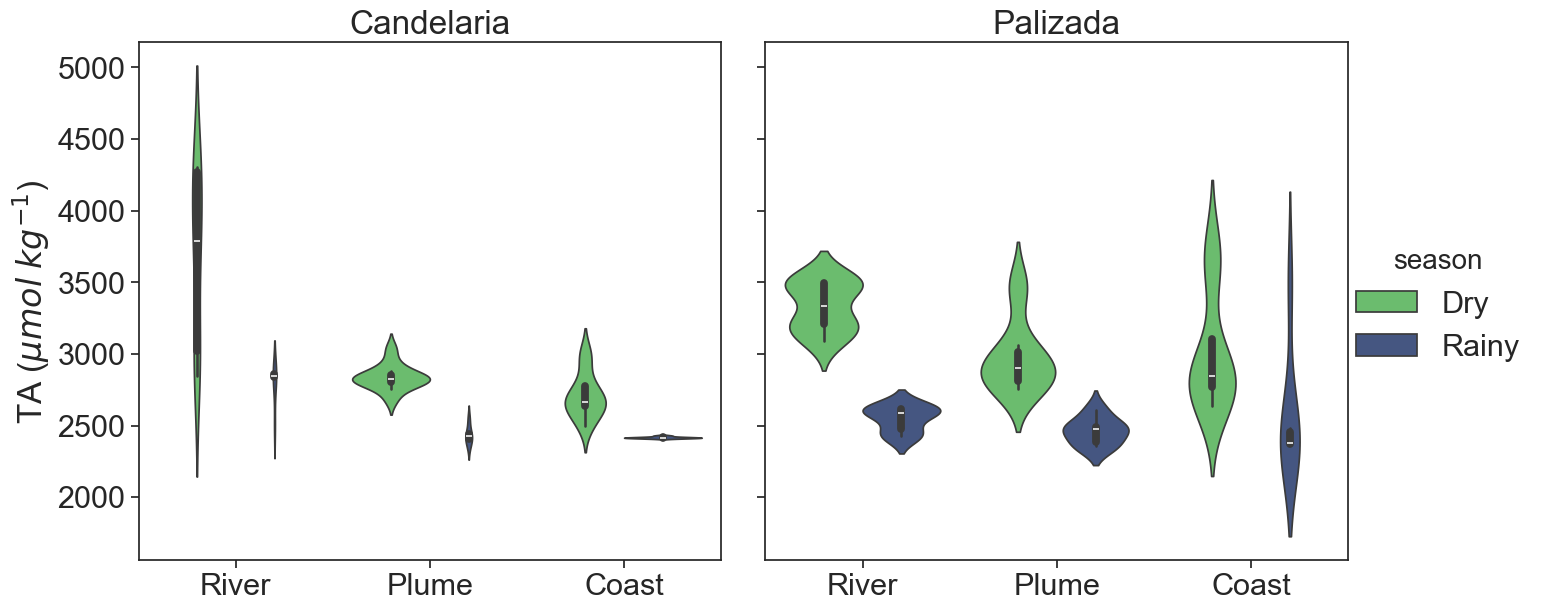

In [5]:
ax = sns.catplot(
    data=CO2Data,
    x="area", y="ta_micromol_kg",
    hue="season", col="estuary",
    kind="violin",
    height=7, aspect=1
)

ax.set(xlabel='', ylabel='TA ($\\mu mol \; kg^{-1}$)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")

# Ajustar título de la leyenda
plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False, right=False)
plt.show()


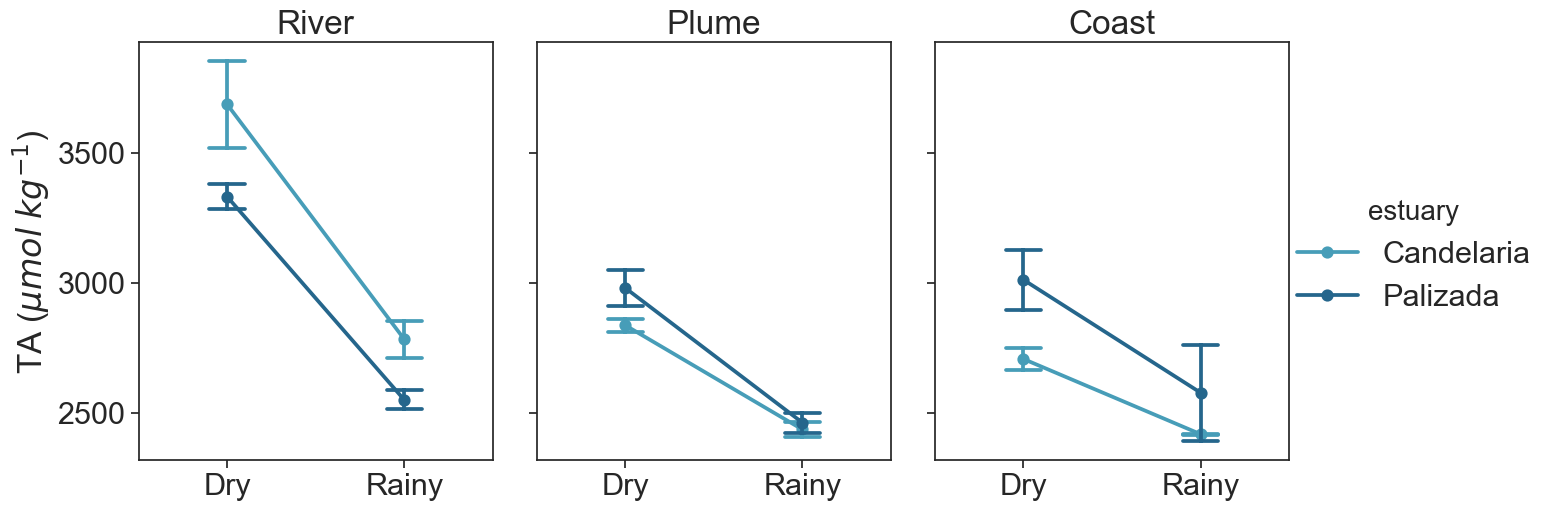

In [6]:
ax = sns.catplot(
    data=CO2Data, x="season",
    y="ta_micromol_kg", hue="estuary", col="area",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75
)

ax.despine(left=True)
ax.set(xlabel='', ylabel='TA ($\\mu mol \\; kg^{-1}$)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False, right=False)
plt.show()


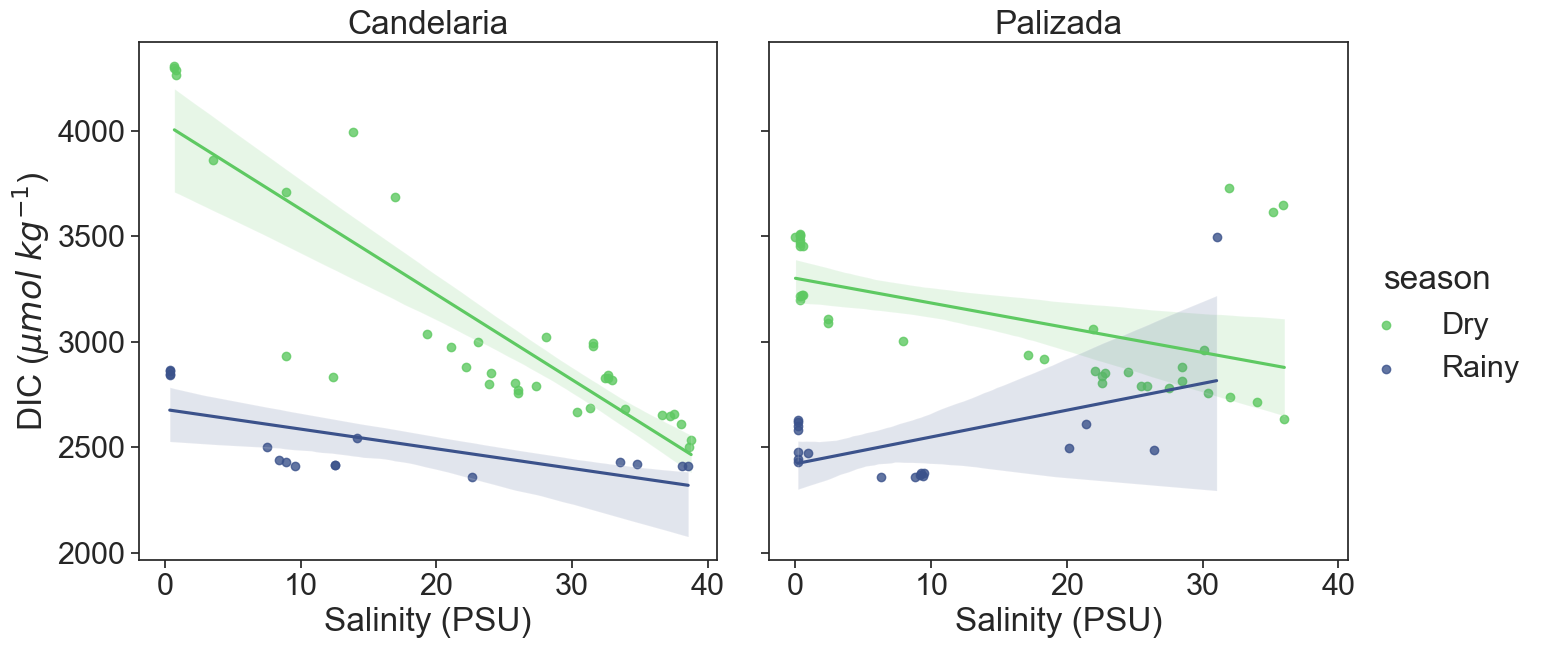

In [7]:
ax = sns.lmplot(
    x="sal_psu", y="ta_micromol_kg",
    hue="season", col="estuary",
    data=CO2Data,
    height=7, aspect=1
)

ax.set(xlabel='Salinity (PSU)', ylabel='DIC ($\\mu mol \\; kg^{-1}$)')
ax.set_titles(col_template="{col_name}", row_template="{row_name}")

# Leyenda (lmplot devuelve FacetGrid, la leyenda viene configurada)
# No tiene _legend directamente como catplot, así que omitimos setp sobre el título de leyenda aquí.

sns.despine(top=False, right=False)
plt.show()


## Ejercicio (figuras propias con Seaborn)

**¿Cómo modificar las unidades en las figuras?**  
- Cambiando etiquetas de ejes con `set(xlabel="...", ylabel="...")` o `plt.xlabel(...) / plt.ylabel(...)`.  
- Usando expresiones LaTeX en las unidades, por ejemplo: `($\mu mol \; kg^{-1}$)`.

A continuación presento **dos figuras propias** hechas con los datos del curso:

1) **Distribución de salinidad por temporada y estuario**  
   - Uso `displot` para ver histogramas normalizados (densidades) de `sal_psu`.  
   - Faceto por `estuary` y coloreo por `season`.  
   - Esto permite comparar visualmente cómo cambia la salinidad entre temporadas y entre estuarios.

2) **Relación TA vs DIC con estilos por área**  
   - Uso `scatterplot` para `ta_micromol_kg` vs `dic_micromol_kg`.  
   - Coloreo por `season` y uso `style` por `area` para distinguir zonas.  
   - Ajusto etiquetas con unidades en LaTeX y un título claro.




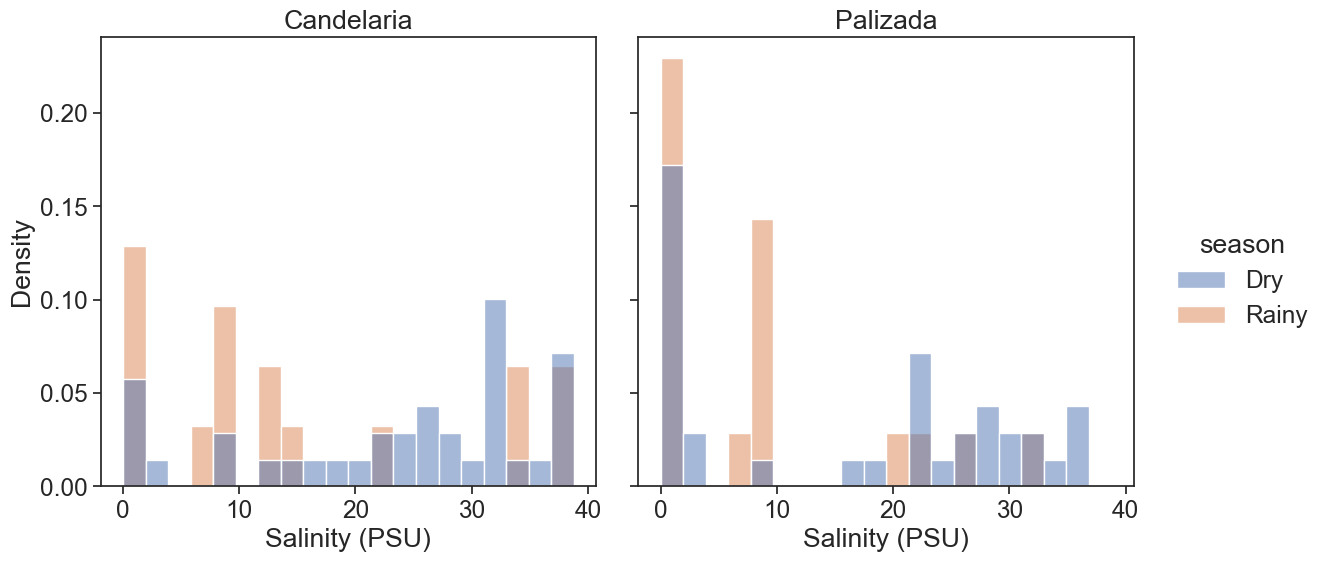

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale=1.6, style="ticks")

g = sns.displot(
    data=CO2Data,
    x="sal_psu",
    hue="season",
    col="estuary",
    kind="hist",
    stat="density",   # normalizado (equivale a “probability” continuo)
    common_norm=False,
    bins=20,
    height=6,
    aspect=1
)

g.set_axis_labels("Salinity (PSU)", "Density")
g.set_titles(col_template="{col_name}")
sns.despine(top=False, right=False)
plt.show()


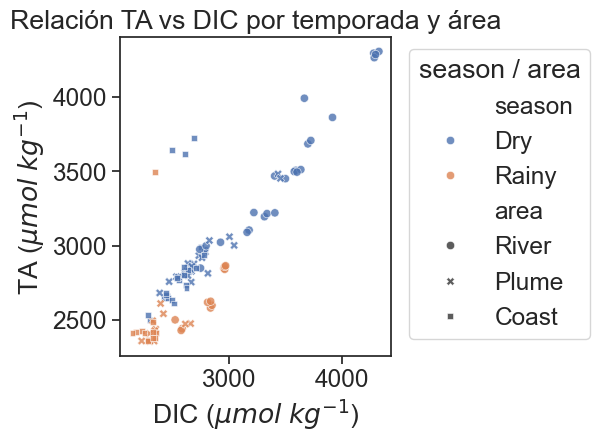

In [9]:
sns.set(font_scale=1.6, style="ticks")

ax = sns.scatterplot(
    data=CO2Data,
    x="dic_micromol_kg",        # eje X: DIC
    y="ta_micromol_kg",         # eje Y: TA
    hue="season",
    style="area",
    alpha=0.8
)

ax.set(
    xlabel="DIC ($\\mu mol \\; kg^{-1}$)",
    ylabel="TA ($\\mu mol \\; kg^{-1}$)",
    title="Relación TA vs DIC por temporada y área"
)

sns.despine(top=False, right=False)
plt.legend(title="season / area", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


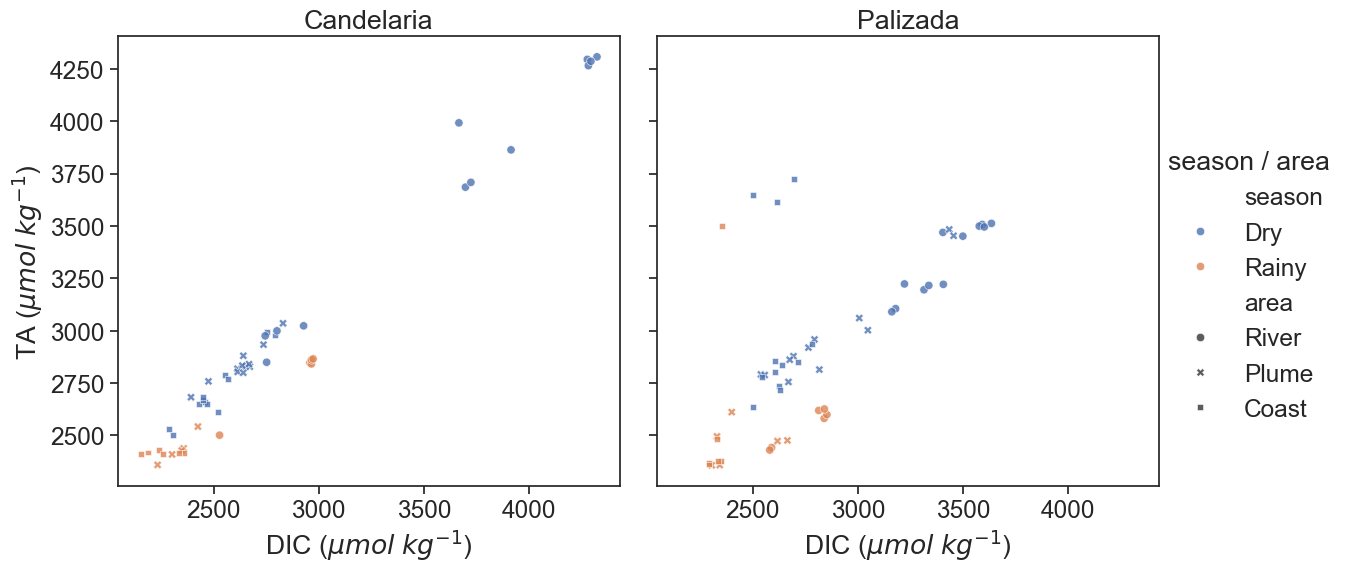

In [10]:
g = sns.FacetGrid(CO2Data, col="estuary", height=6, aspect=1)
g.map_dataframe(sns.scatterplot, x="dic_micromol_kg", y="ta_micromol_kg", hue="season", style="area", alpha=0.8)
g.add_legend(title="season / area")
g.set_axis_labels("DIC ($\\mu mol \\; kg^{-1}$)", "TA ($\\mu mol \\; kg^{-1}$)")
g.set_titles(col_template="{col_name}")
sns.despine(top=False, right=False)
plt.show()
